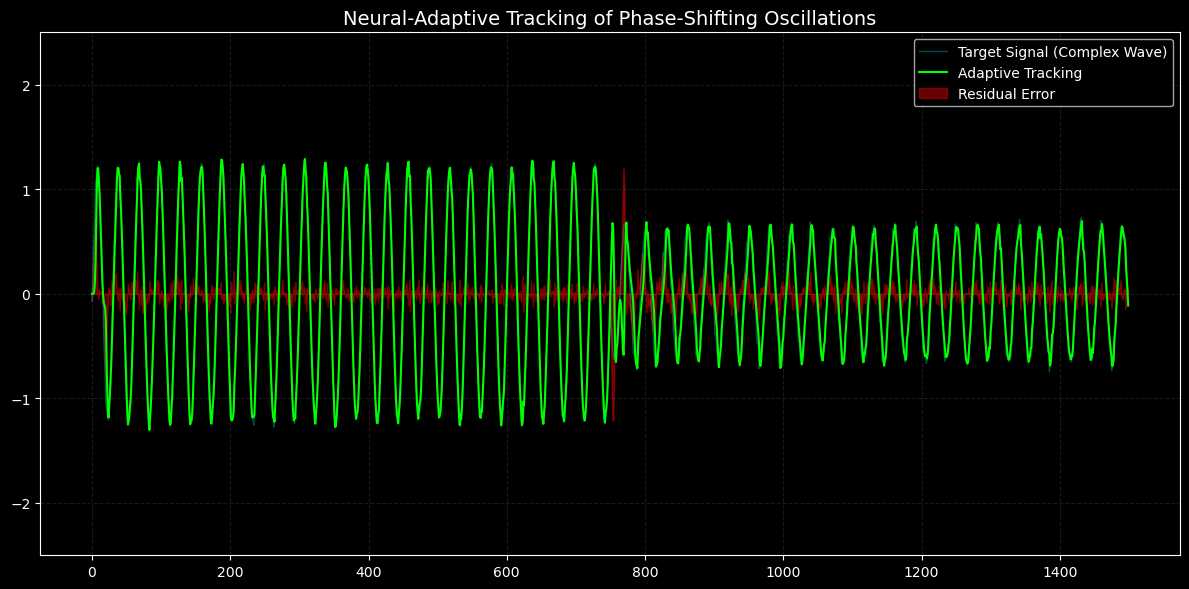

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydaptivefiltering as pdf

# --- 1. Gerar uma "Onda em Evolução" ---
N = 1500
t = np.linspace(0, 10, N)
# Onda que muda de frequência e fase no meio
x = np.sin(2 * np.pi * 5 * t)  # Entrada: Senoide pura
d = np.zeros(N)

for k in range(N):
    if k < 750:
        # Sistema 1: Atraso e ganho simples
        d[k] = 0.8 * x[k] + 0.4 * x[max(0, k-1)]
    else:
        # Sistema 2: Inversão de fase e ganho maior (Onda "vira")
        d[k] = -1.2 * x[k] + 0.6 * x[max(0, k-1)]
    d[k] += 0.05 * np.random.randn() # Ruído

# --- 2. Filtro de Volterra (Para dar um ar sofisticado) ---
# O Volterra consegue pegar não-linearidades que o LMS comum sofre
filt = pdf.VolterraLMS(memory=3, step_size=0.05)
res = filt.optimize(x, d)

# --- 3. O Gráfico "Irado" (Visual Estilo Radar/Osciloscópio) ---
plt.style.use('dark_background') # Fundo escuro realça as ondas
fig, ax = plt.subplots(figsize=(12, 6))

# Sinal Desejado (A onda que queremos seguir)
ax.plot(d, color='cyan', alpha=0.3, label='Target Signal (Complex Wave)', lw=1)

# Saída do Filtro (O rastro do algoritmo)
ax.plot(res.outputs, color='lime', label='Adaptive Tracking', lw=1.5)

# O Erro (Como se fosse um batimento cardíaco)
error_signal = d - res.outputs
ax.fill_between(range(N), error_signal, color='red', alpha=0.4, label='Residual Error')

ax.set_title("Neural-Adaptive Tracking of Phase-Shifting Oscillations", color='white', fontsize=14)
ax.set_ylim([-2.5, 2.5])
ax.legend(loc='upper right')
ax.grid(color='gray', linestyle='--', alpha=0.2)

plt.tight_layout()
plt.show()